<a href="https://colab.research.google.com/github/Sandeshwebdev1999/EDA_python/blob/main/Yes_bank_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Yes_Bank_Stock Data Prediction**



---

##### **Project Type**    - Regression



---

##### **Contribution**    - Individual
##Student Name : **Sandesh Ingle**

---

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Sandeshwebdev1999/EDA_python/blob/main/Yes_bank_stock_prediction.ipynb

---

# ***Let's Begin !***

---

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

---

### Dataset Loading

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Copy of Copy of data_YesBank_StockPrices.csv'
df=pd.read_csv(path)

---

### Dataset First View

In [ ]:
# # Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


---

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

---

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


___

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

---

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


___

### What did we know about this dataset?

- **Columns:**

  1. **Date:** This column represents the date for each record, but the data type is currently an `object`, which typically means it might be stored as a string. It likely needs to be converted to a `datetime` format for proper handling of time-based operations.

  2. **Open:** This column shows the opening price of a stock on each date, stored as a `float64`.

  3. **High:** This represents the highest price reached by the stock on that date, stored as a `float64`.

  4. **Low:** This column reflects the lowest price for the stock on that date, also stored as a `float64`.

  5. **Close:** This column shows the closing price for the stock at the end of the day, stored as a `float64`.

### Data Types:

- Four columns (`Open`, `High`, `Low`, `Close`) are of the `float64` data type, which is appropriate for storing continuous numerical values.

- The `Date` column is of the `object` type, which suggests it might not be in the optimal `datetime` format.



___



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

___

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


___

### Variables Description

####Description of Variables:

**Date**: This column represents the date when the stock market data was recorded. It provides the timestamp for each entry and is typically used to analyze trends, seasonality, and other time-dependent patterns in stock prices.

**Open**: This column indicates the opening price of the stock for a particular trading day. It is the price at which the stock first trades when the market opens. It serves as an important indicator for analyzing market trends and comparing with the closing price.

**High:** This column represents the highest price at which the stock traded during a given day. It helps measure the price volatility within the day, and can be used to understand the peak of market interest or stock price movement during that day.

**Low:** The lowest price the stock reached during the trading day. It shows the lowest value the stock traded at and can help assess the volatility and risk of the stock.

**Close:** This column shows the closing price of the stock at the end of the trading day. It is typically the most widely followed price for a stock, as it reflects the final consensus of its value after market hours. It is often used for technical analysis and calculating returns.

___

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
print(unique_counts)

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


____

## 3. ***Data Wrangling***

#### **Formatting the Date Column**  
- **Use**: To convert the **Date** column, which is in the "Month-Year" format (e.g., "Jul-05"), into a proper **datetime** format for accurate time-based analysis.  

- **Purpose**: This transformation ensures that the **Date** column is in a structured datetime format, enabling proper handling of time-series data and facilitating efficient data manipulation, filtering, and plotting. The conversion typically defaults the day to the first of the month for consistency.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [ ]:
df['Date'].tail()

,Date
180,2020-07-01
181,2020-08-01
182,2020-09-01
183,2020-10-01
184,2020-11-01


___

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


____

####**Line Plot (Time Series Plot)**  
   - **Use**: To visualize stock prices over time, such as plotting the **Open**, **Close**, **High**, and **Low** prices on a daily or weekly basis.  

   - **Purpose**: This plot helps in understanding stock trends and price movements, providing insights into the stock's performance over a given time period.

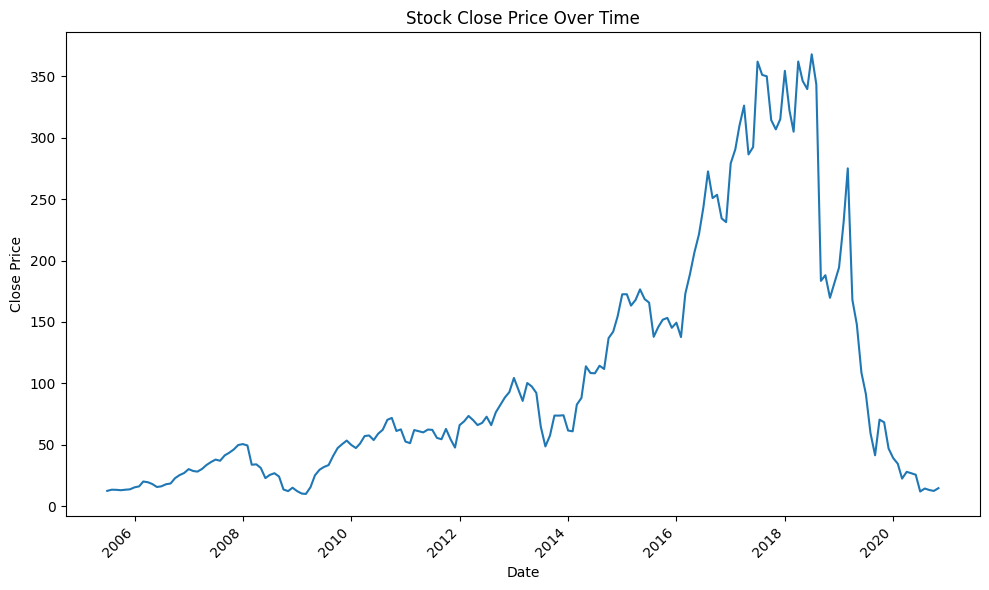

In [ ]:
plt.figure(figsize=(10,6))  # Increase figure size for better label spacing
plt.plot(df['Date'], df['Close'])
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels to the right for better clarity
plt.tight_layout()  # Automatically adjust the layout to prevent label cutoff
plt.show()


____

#### **Correlation Heatmap**  
- **Use**: To visualize the correlation between different stock prices (such as **Open**, **High**, **Low**, and **Close**).  
- **Purpose**: This plot displays the correlation between the data columns, helping to identify which variables are strongly related.

<Axes: >

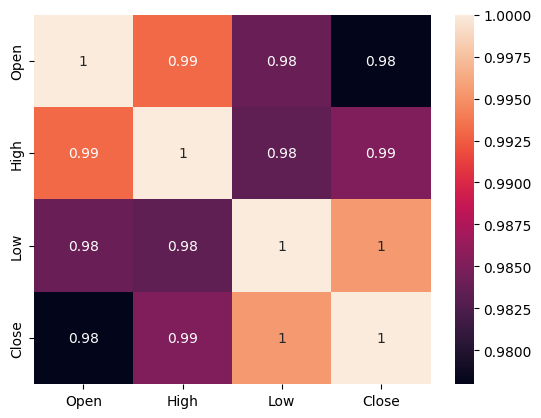

In [ ]:
num_columns = df[['Open','High','Low','Close']]
sns.heatmap(num_columns.corr(),annot=True)

### Summary:

The plot is showing a correlation matrix for stock price data, where the values represent the correlation coefficients between the **Open**, **High**, **Low**, and **Close** prices of a stock. The values range from 0 to 1, indicating the strength and direction of the linear relationships between these variables.


These high correlation coefficients indicate that the stock's opening, highest, lowest, and closing prices are strongly related, as expected in typical stock price behavior.

____

<Figure size 600x200 with 0 Axes>

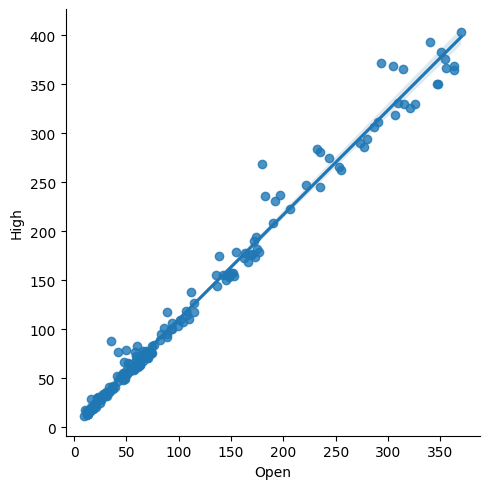

In [ ]:
plt.figure(figsize=(6,2))
sns.lmplot(x='Open',y='High',data=df)

#### **Linear Relationship Plot**  
- **Use**: To visualize the linear relationship between two variables, such as **Open** vs **High** prices.  

- **Purpose**: This plot shows the correlation between the two variables by fitting a regression line, helping to identify the strength and direction of the linear relationship between them.

____

#### **Scatter Plot**  
- **Use**: To illustrate the relationship between two variables, such as **Open** vs **Low** prices.  

- **Purpose**: This plot visualizes the correlation and dependency between the two data points, helping to identify patterns or trends in the stock price data.

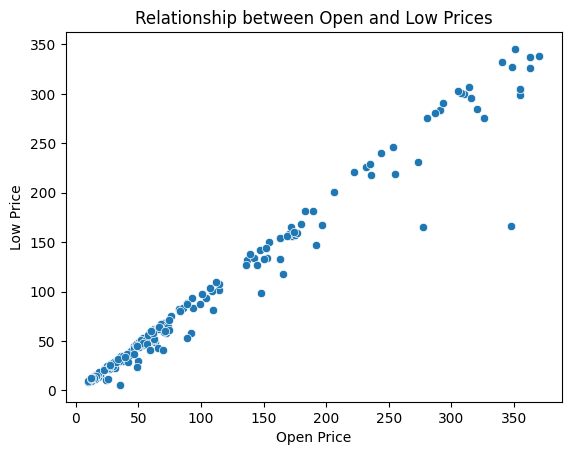

In [ ]:
sns.scatterplot(x='Open', y='Low', data=df)
# Adding title and labels
plt.title('Relationship between Open and Low Prices')
plt.xlabel('Open Price')
plt.ylabel('Low Price')
plt.show()


____

#### **Scatter Plot**  
- **Use**: To illustrate the relationship between two variables, such as **Open** vs **Close**.  

- **Purpose**: This plot visualizes the correlation and dependency between two data points, helping to identify patterns or trends.  

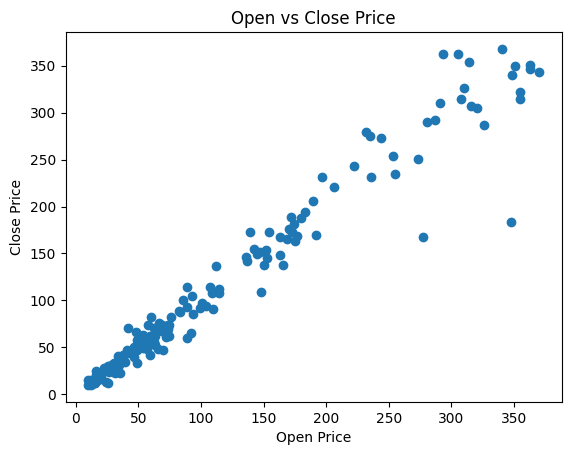

In [ ]:
plt.scatter(df['Open'], df['Close'])
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

____

#### **Box Plot**  
- **Use**: To understand the distribution of stock prices and identify outliers, such as the distribution of the **Close** price.  
- **Purpose**: This plot shows the spread of the data and highlights outliers, helping to understand the variability of stock prices.

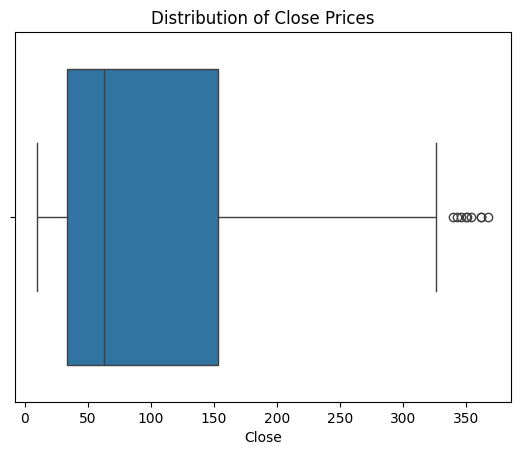

In [ ]:
sns.boxplot(x=df['Close'])
plt.title('Distribution of Close Prices')
plt.show()

____

#### **Histogram**  
- **Use**: To visualize the distribution of stock prices, such as the frequency distribution of **Close** prices.  
- **Purpose**: This plot shows the spread of stock prices, allowing you to identify the range where prices are most concentrated.

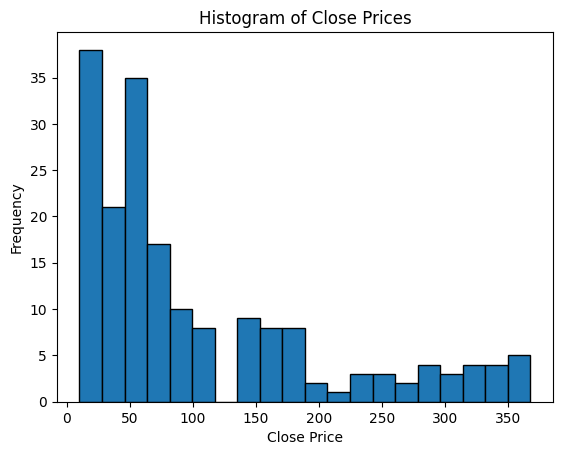

In [ ]:
plt.hist(df['Close'], bins=20, edgecolor='black')
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

____

#### **Candlestick Plot**  
- **Use**: To provide a detailed representation of stock prices, displaying the **Open**, **High**, **Low**, and **Close** prices for a specific time period.  

- **Purpose**: This plot is used in technical analysis and provides a clear picture of the stock's price movement.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(title='Candlestick Chart')
fig.show()


____

####**Volatility Plot**  
- **Use**: To display the volatility (price fluctuations) of stock prices, such as plotting daily returns.  

- **Purpose**: This plot measures the stock's risk or volatility, helping inform trading decisions.

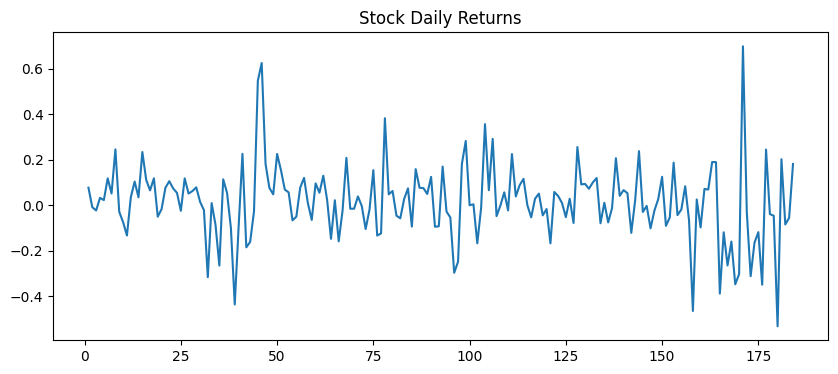

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(10, 4))
plt.title('Stock Daily Returns')
plt.show()

_____

#### **Rolling Average Plot (Moving Average)**  
- **Use**: To smooth out stock price trends, such as plotting the moving average of the **Close** price.  

- **Purpose**: This plot helps to smooth short-term fluctuations in stock prices, providing a clearer view of the overall trend.

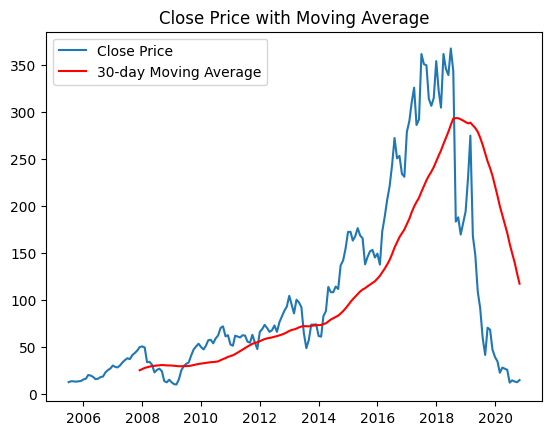

In [ ]:
df['Rolling_MA'] = df['Close'].rolling(window=30).mean()
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Rolling_MA'], label='30-day Moving Average', color='red')
plt.title('Close Price with Moving Average')
plt.legend()
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
x = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

In [ ]:
x.head(),y.head()

(    Open   High    Low
 0  13.00  14.00  11.25
 1  12.58  14.88  12.55
 2  13.48  14.87  12.27
 3  13.20  14.47  12.40
 4  13.35  13.88  12.88,
 0    12.46
 1    13.42
 2    13.30
 3    12.99
 4    13.41
 Name: Close, dtype: float64)

In [ ]:
df.shape

(185, 5)

## ***6. Data Splitting***

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('train dataset feature shape :- ',x_train.shape)
print('train dataset target shape :- ',y_train.shape)
print('test dataset feature shape :- ',x_test.shape)
print('test dataset target shape :- ',y_test.shape)

train dataset feature shape :-  (148, 3)
train dataset target shape :-  (148,)
test dataset feature shape :-  (37, 3)
test dataset target shape :-  (37,)


____

### ***7. Model Implementing***




### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([-0.50522745,  0.53683265,  1.00342375])

In [ ]:
train_pred = model.predict(x_train)
train_pred[:5]

array([62.15252675, 52.11063458, 48.86679045, 16.06508903, 14.84112506])

In [ ]:
print(y_train[:5])

65    62.54
67    51.29
31    49.42
12    16.16
41    15.03
Name: Close, dtype: float64


In [ ]:
test_pred = model.predict(x_test)
test_pred[:5]

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845])

In [ ]:
print(y_test[:5])

19      28.63
42      12.24
156    367.90
111    136.83
148    306.80
Name: Close, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,r2_score
import math

In [ ]:
print('mean absolute percentage error on train dataset is :- ',mean_absolute_percentage_error(y_train,train_pred)*100)
print('mean absolute error on train dataset is :- ',mean_absolute_error(y_train,train_pred))
print('mean squared error on train dataset is :- ',mean_squared_error(y_train,train_pred))
print('root mean squared error on train dataset is :- ',math.sqrt(mean_squared_error(y_train,train_pred)))
print('r2 score on train dataset is :- ',r2_score(y_train,train_pred))

mean absolute percentage error on train dataset is :-  4.900582458047428
mean absolute error on train dataset is :-  3.7116702329950253
mean squared error on train dataset is :-  38.06662835877643
root mean squared error on train dataset is :-  6.169815909634292
r2 score on train dataset is :-  0.9961188216222026


In [ ]:
print('mean absolute percentage error on test dataset is :- ',mean_absolute_percentage_error(y_test,test_pred)*100)
print('mean absolute error on test dataset is :- ',mean_absolute_error(y_test,test_pred))
print('mean squared error on test dataset is :- ',mean_squared_error(y_test,test_pred))
print('root mean squared error on test dataset is :- ',math.sqrt(mean_squared_error(y_test,test_pred)))
print('r2 score on test dataset is :- ',r2_score(y_test,test_pred))

mean absolute percentage error on test dataset is :-  7.919497918652143
mean absolute error on test dataset is :-  5.812554509942111
mean squared error on test dataset is :-  86.64379126513735
root mean squared error on test dataset is :-  9.30826467528386
r2 score on test dataset is :-  0.9904142726548665


____

#### **Creating a function for scores**

In [ ]:
# Appending all models parameters to the corrosponding list

def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')



  print('*'*80)

  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

Training score  = 0.9961188216222026
MAE : 5.812554509942111
MSE : 86.64379126513735
RMSE : 9.30826467528386
R2 : 0.9904142726548665
Adjusted R2 :  0.989542842896218 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


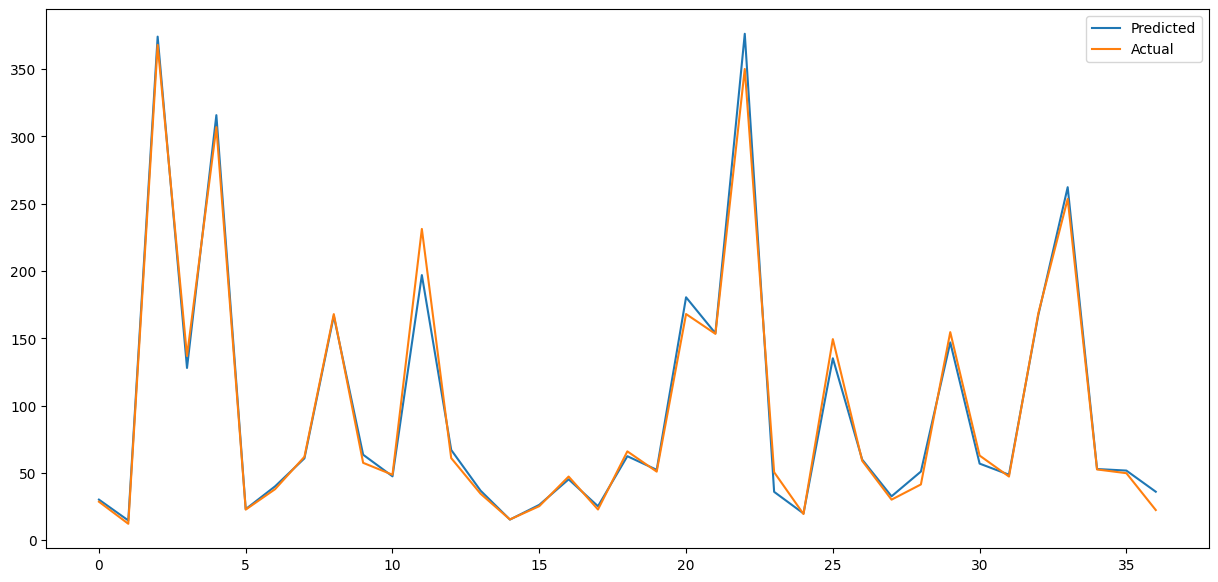

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

___

### ML Model - 2

### **Polynomial**

In [ ]:
#creating variable with degree 2
poly = PolynomialFeatures(2)

# fit the train set
poly_X_train = poly.fit_transform(x_train)

#transform the test set
poly_X_test = poly.transform(x_test)

Training score  = 0.9974456068858849
MAE : 6.015662201922957
MSE : 112.73080340841784
RMSE : 10.617476320125128
R2 : 0.9875281687343967
Adjusted R2 :  0.9827313105553186 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


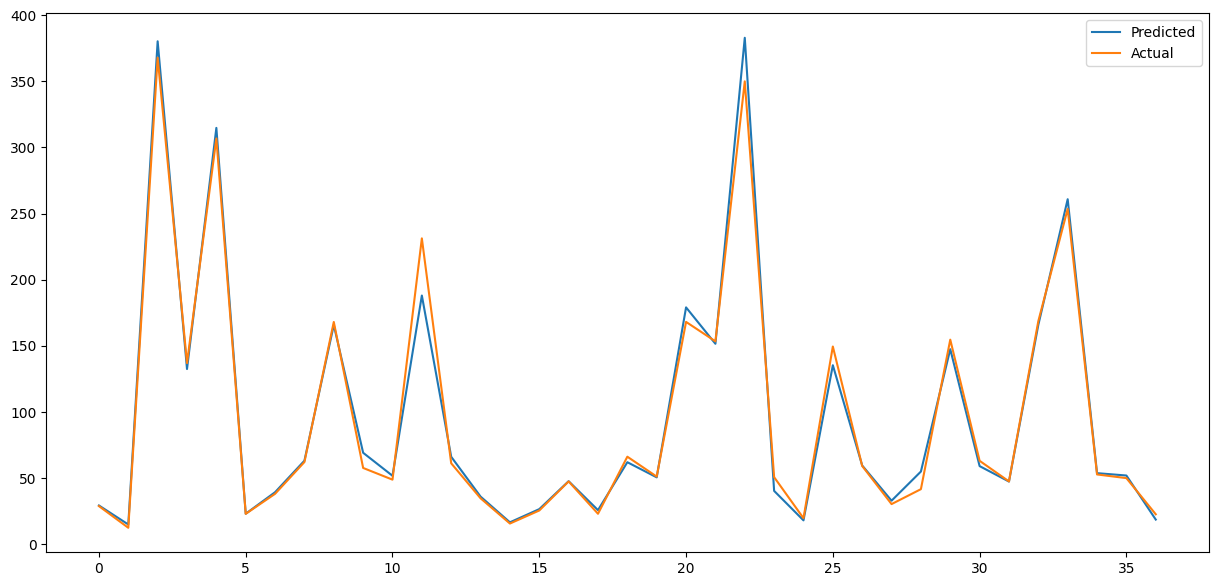

In [ ]:
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

____

### ML Model - 3

### **KNN Regression**

Training score  = 0.9893647845407764
MAE : 9.398162162162162
MSE : 336.1985935135135
RMSE : 18.335719061807026
R2 : 0.9628050896182954
Adjusted R2 :  0.9594237341290495 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


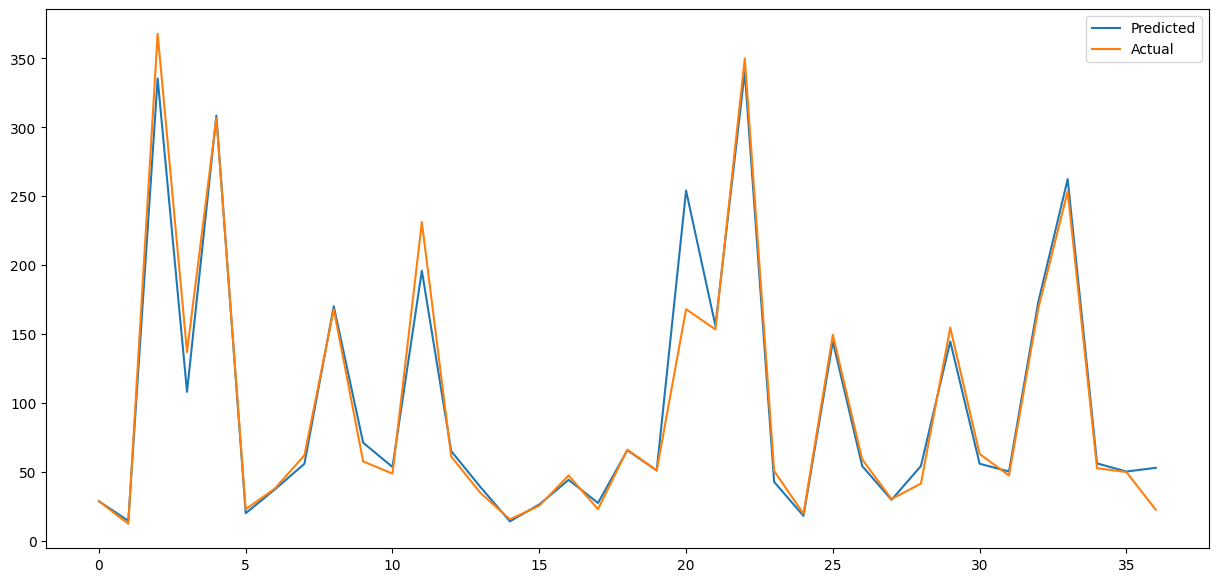

In [ ]:
knn = KNeighborsRegressor()

# Fitting Knn regressor
score_metrix(knn,x_train,x_test,y_train,y_test)

_____

#### Let's now compare **Model 1**, **Model 2**, and **Model 3** to determine which one performs the best based on the given evaluation metrics.

### **Model 1:**
   - **Training Score**: 0.9961
   - **MAE**: 5.81
   - **MSE**: 86.64
   - **RMSE**: 9.31
   - **R²**: 0.9904
   - **Adjusted R²**: 0.9895

### **Model 2:**
   - **Training Score**: 0.9974
   - **MAE**: 6.02
   - **MSE**: 112.73
   - **RMSE**: 10.62
   - **R²**: 0.9875
   - **Adjusted R²**: 0.9827

### **Model 3:**
   - **Training Score**: 0.9894
   - **MAE**: 9.40
   - **MSE**: 336.20
   - **RMSE**: 18.34
   - **R²**: 0.9628
   - **Adjusted R²**: 0.9594


____

### **Comparison:**

#### **1. Training Score:**
   - **Model 2** has the highest **Training Score** (**0.9974**), which indicates that it explains 99.74% of the variance in the training data.
   - **Model 1** follows closely with a **Training Score** of **0.9961**.
   - **Model 3** has the lowest **Training Score** (**0.9894**), indicating that it explains less of the variance compared to the other two.

#### **2. MAE (Mean Absolute Error):**
   - **Model 1** has the lowest **MAE** (**5.81**), meaning its average prediction error is the smallest.
   - **Model 2** has a slightly higher **MAE** (**6.02**), indicating it has a slightly larger average prediction error compared to Model 1.
   - **Model 3** has the highest **MAE** (**9.40**), indicating the highest average error in predictions.

#### **3. MSE (Mean Squared Error) and RMSE (Root Mean Squared Error):**
   - **Model 1** also performs the best with the lowest **MSE** (**86.64**) and **RMSE** (**9.31**), indicating lower squared errors and overall better prediction accuracy.
   - **Model 2** has higher **MSE** (**112.73**) and **RMSE** (**10.62**) compared to **Model 1**, suggesting its predictions have slightly higher errors.
   - **Model 3** has significantly higher **MSE** (**336.20**) and **RMSE** (**18.34**), indicating a much higher level of prediction error.

#### **4. R² (Coefficient of Determination) and Adjusted R²:**
   - **Model 1** has the highest **R²** (**0.9904**) and **Adjusted R²** (**0.9895**), indicating it explains the most variance in the data and performs well even after adjusting for the number of predictors.
   - **Model 2** has slightly lower **R²** (**0.9875**) and **Adjusted R²** (**0.9827**) than **Model 1**, but still very high, suggesting a good fit but slightly less predictive power than Model 1.
   - **Model 3** has the lowest **R²** (**0.9628**) and **Adjusted R²** (**0.9594**), indicating that it explains less of the variance in the data and has the poorest overall fit.


____


### **Conclusion:**

- **Model 1** is the **best model** overall based on these metrics. It has the highest **Training Score**, the lowest **MAE**, **MSE**, and **RMSE**, and the highest **R²** and **Adjusted R²**. This indicates that Model 1 provides the most accurate predictions with minimal error and explains the most variance in the data.

- **Model 2** is also a strong model with a high **Training Score** and good performance, but it lags slightly behind **Model 1** in terms of **MAE**, **MSE**, **RMSE**, and **R²**.

- **Model 3** performs the worst in comparison, with the highest errors and the lowest explained variance. It should likely be improved or reconsidered for use.

____